

## Regression as Neural Networks Practical


In [1]:
import pandas #impoting pandas for reading data
import numpy as np #importing numpy as np

np.random.seed(1337) #for reproducibility

import tensorflow as tf #importing tensorflow library

from tensorflow.keras import Sequential #importing sequential from keras
from tensorflow.keras.layers import Dense #importing dense from keras
from tensorflow.keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
#importing sklearn library 
from sklearn.metrics import mean_squared_error #importing mean squared error from sklearn
from sklearn.preprocessing import StandardScaler #importing Standard scaler from sklearn
from sklearn.model_selection import train_test_split#importing train test split from sklearn
import matplotlib.pyplot as plt #importing matplotlib for the plots

In [2]:
dataframe = pandas.read_csv("https://raw.githubusercontent.com/eijaz1/Deep-Learning-in-Keras-Tutorial/master/data/hourly_wages_data.csv")
dataset = dataframe.values

In [3]:
dataframe.head() #viewing the data

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [4]:
X = dataframe.drop(columns=['wage_per_hour']).values
Y = dataframe['wage_per_hour'].values

1). The neural network will have 9 inputs, Number of inputs here is the number of features

2). The neural network will have 1 output, The predicted salary

3). The goal here is to predict the hourly salary or weekly salary or monthly salary of a person given some           characteristics.



## Checking the splitted data

In [5]:
X.shape #checking the shape of X features

(534, 9)

In [6]:
Y.shape #Checking the shape of Y output

(534,)

In [7]:
Y[0:5] #viewing the first five outputs

array([5.1 , 4.95, 6.67, 4.  , 7.5 ])

## Splitting data into training and testing

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3) #Splitting the data

## Create a neural network model

In [9]:
# defining the model
def baseline():
    # creating the model
    model = Sequential()
    
    #adding a fully connected layer
    model.add(Dense(units = 8, input_dim=9, activation='relu'))
    
    # add a fully connected layer for the output
    model.add(Dense(1))
    
    # Compilling model
    model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse])
    
    return model

## Initialise model

In [10]:
model = baseline() #initialising the model

## Determine the number of trainable parameters

In [11]:
model.summary() #model summary  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [12]:
history = model.fit(X_train, Y_train, epochs=24, batch_size=4, verbose=1) #training the model over 24 epochs

Epoch 1/24
94/94 [==============================] - 1s 2ms/step - loss: 40.3111 - mean_squared_error: 40.3111
Epoch 2/24
94/94 [==============================] - 0s 3ms/step - loss: 29.8172 - mean_squared_error: 29.8172
Epoch 3/24
94/94 [==============================] - 0s 2ms/step - loss: 27.8998 - mean_squared_error: 27.8998
Epoch 4/24
94/94 [==============================] - 0s 2ms/step - loss: 26.5716 - mean_squared_error: 26.5716
Epoch 5/24
94/94 [==============================] - 0s 2ms/step - loss: 25.9390 - mean_squared_error: 25.9390
Epoch 6/24
94/94 [==============================] - 0s 3ms/step - loss: 25.4208 - mean_squared_error: 25.4208
Epoch 7/24
94/94 [==============================] - 0s 5ms/step - loss: 25.0445 - mean_squared_error: 25.0445
Epoch 8/24
94/94 [==============================] - 0s 4ms/step - loss: 24.8275 - mean_squared_error: 24.8275
Epoch 9/24
94/94 [==============================] - 0s 4ms/step - loss: 24.6504 - mean_squared_error: 24.6504
Epoch 10/2

## Predict on the test data

In [13]:
prediction = model.predict(X_test) #predicting the test data

6/6 [==============================] - 0s 5ms/step


## Compute the mean squared error

In [14]:
mean_squared_error(Y_test, prediction) #getting the mean squared error

15.16761658863278

## Plot the error over the epochs

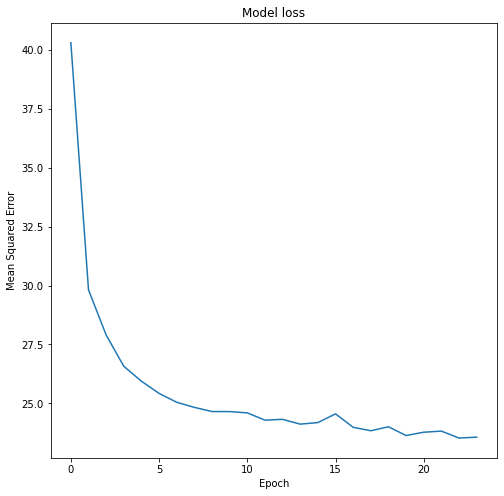

In [15]:
#plotting the error on different epochs
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()